In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings 
warnings.filterwarnings("ignore")


In [2]:
train_data = pd.read_csv("./data/train.csv")

In [3]:
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [5]:
train_data = train_data.drop("id", axis=1)

In [6]:
train_data.shape

(54273, 12)

In [7]:
train_data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [8]:
# drop model column
train_data = train_data.drop("model", axis=1)

In [9]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [10]:
train_data.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', '–',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [11]:
# Replace '-' and notsupported values in fuel_type with 'Electric'
train_data.fuel_type.replace('–', 'Electric', inplace=True)

train_data.fuel_type.replace('not supported', 'Electric', inplace=True)

In [12]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [13]:
import re
# Define a function to extract engine attributes

def extract_engine_features(engine_str):
    # Extract displacement
    displacement = re.search(r"(\d+\.\d+)L", engine_str)
    engine_displacement = float(displacement.group(1)) if displacement else None

    # Extract horsepower
    horsepower = re.search(r"(\d+\.\d+)HP", engine_str)
    engine_horsepower = float(horsepower.group(1)) if horsepower else None

    # # Extract number of cylinders
    # num_cylinders = re.search(r"\d+\s?Cylinder", engine_str)
    # num_cylinders = int(num_cylinders.group().split()[0]) if num_cylinders else None

    # # Extract cylinder configuration
    # cylinder_config = "V" if "V" in engine_str else "Straight" if "Straight" in engine_str else None

    # # # Extract fuel type
    # # fuel_type = re.search(r"(Gasoline|Diesel|Electric|Flex Fuel)", engine_str)
    # # fuel_type = fuel_type.group(1) if fuel_type else None

    return engine_displacement, engine_horsepower #, num_cylinders, cylinder_config

In [14]:
# Create two new features from the engine column 
train_data[['horsepower', 'engine_displacement']] = train_data.engine.apply(extract_engine_features).apply(pd.Series)

In [15]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [16]:
train_data.horsepower.isnull().sum()

606

In [17]:
train_data.engine_displacement.isnull().sum()

4057

In [18]:
# Replace missing horsepower and displacement values with mean
train_data.horsepower.fillna(train_data.horsepower.mean(), inplace =True)
train_data.engine_displacement.fillna(train_data.engine_displacement.mean(), inplace=True)

In [19]:
train_data.horsepower.isnull().sum()

0

In [20]:
train_data.engine_displacement.isnull().sum()

0

In [21]:
train_data.head()

,brand,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement
0,Ford,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0
1,BMW,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0
2,Jaguar,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0
3,BMW,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0
4,Pontiac,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,3.8,200.0


In [22]:
# drop engine column 
train_data.drop("engine", axis=1, inplace=True)


In [23]:
train_data.shape

(54273, 12)

In [24]:
# Getting car age 
train_data["age"] = 2024 - train_data.model_year

In [25]:
train_data.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_displacement,age
0,Ford,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,Yes,11000,3.5,375.0,6
1,BMW,2007,80000,Gasoline,6-Speed M/T,Black,Black,None reported,Yes,8250,3.0,300.0,17
2,Jaguar,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,Yes,15000,4.2,300.0,15
3,BMW,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,3.0,335.0,2
4,Pontiac,2001,111000,Gasoline,A/T,White,Black,None reported,Yes,7850,3.8,200.0,23


In [26]:
# Drop model year 
train_data.drop("model_year", axis=1, inplace=True)

> INSIGHTS 

* By the end of the data wrangling process these columns were dropped (`model_year`, `engine`, `model`)
* From the `engine` column the `horsepower` and `engine_displacement` were obtained.
* Car `age` was gotten from `model_year`

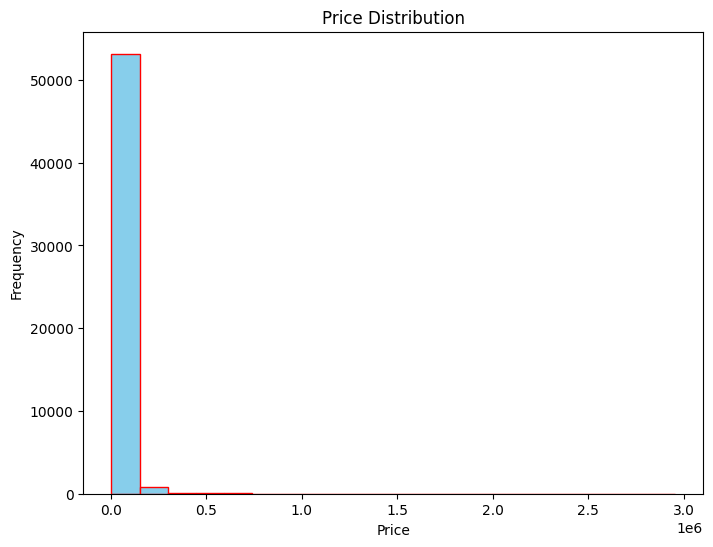

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(train_data.price, bins=20, color='skyblue', edgecolor = 'red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

 Above histogram shows the price of most cars lie in the lower range of prices



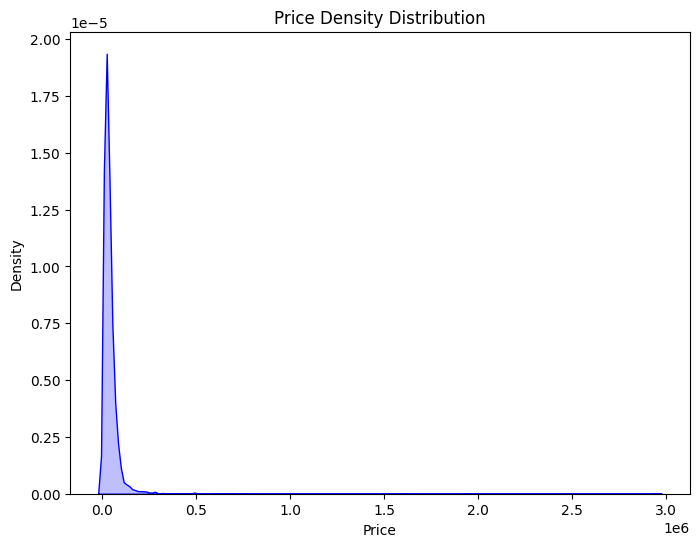

In [28]:
# plot figure to show density distribution 

plt.figure(figsize=(8, 6))
sns.kdeplot(train_data.price, color='blue', shade=True)
plt.title("Price Density Distribution")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The above distributions indicates a large amounts of outliers expecially above 0.5 on the price axis

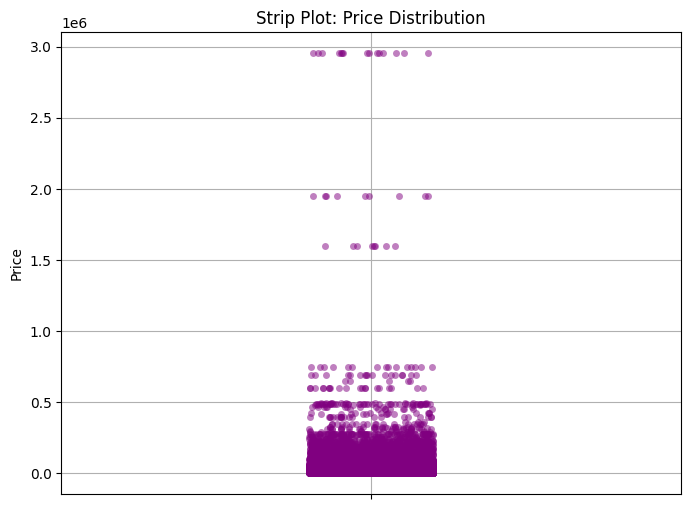

In [29]:
# Create a strip plot for the  `price` variable 
plt.figure(figsize=(8, 6))
sns.stripplot(data=train_data, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()


The strip plot above clearly shows where the outliers start to form

In [30]:
train_data.price.describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

### Removing outliers using the IQR Method

In [31]:
Q1 = train_data.price.quantile(0.25)
Q3 = train_data.price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


29500.0


In [32]:
# Using the IQR value to filter out the outliers 
train_data = train_data[~((train_data.price < (Q1 - 1.5 * IQR)) | (train_data.price > (Q3 + 0.7 * IQR)))]
train_data.shape

(47678, 12)

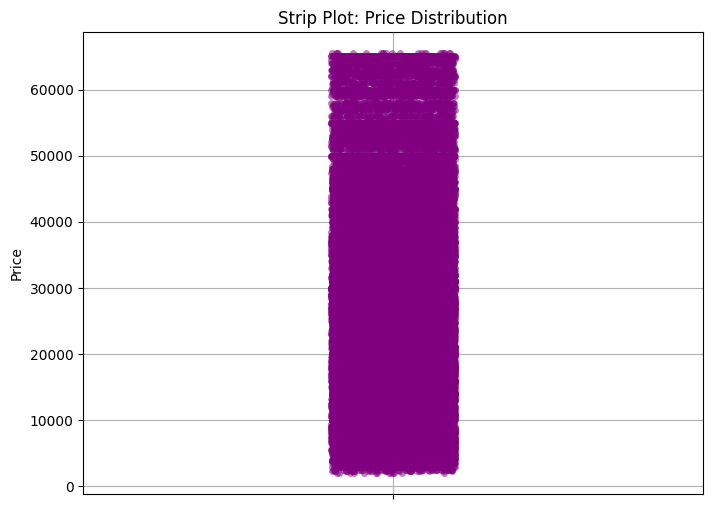

In [33]:
# Redoing the strip plot 

plt.figure(figsize=(8, 6))
sns.stripplot(data = train_data, y = 'price', jitter=True, color='purple', alpha = 0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The above strip plot shows there are no longer any outliers 

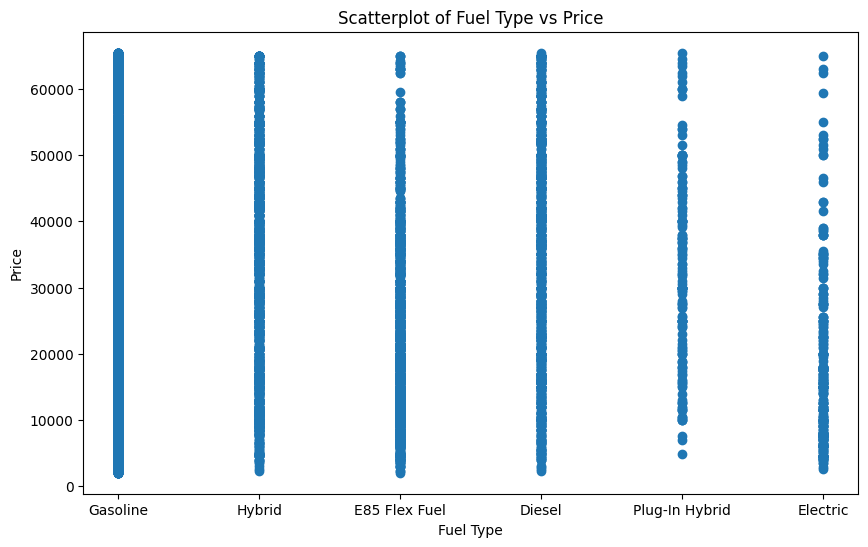

In [34]:
# Plot fuel price with respect to price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data['fuel_type'], train_data['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gasoline'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'E85 Flex Fuel'),
  Text(3, 0, 'Diesel'),
  Text(4, 0, 'Plug-In Hybrid'),
  Text(5, 0, 'Electric')])

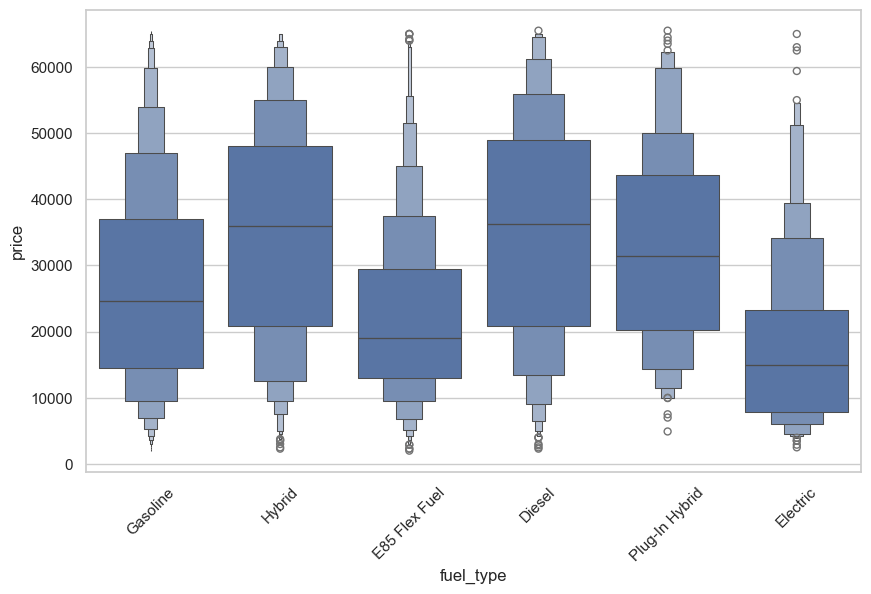

In [35]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxenplot(x = train_data.fuel_type, y=train_data.price, data= train_data)
plt.xticks(rotation = 45)


In [36]:
# Calculate Quantiles 

Q1 = train_data.price.quantile(0.25)
Q2 = train_data.price.median()
Q3 = train_data.price.quantile(0.75)

# Define a function to categorize data points into quantiles 
def categorized_quantile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"
    

In [37]:
# Apply the categorized_quatile function to the original price column 
train_data['quartile'] =  train_data.price.apply(categorized_quantile)

# Count the number of data points in each quartile 
quartile_counts = train_data.quartile.value_counts().reset_index()
quartile_counts.columns = ['quartile', 'count']
# Display Quartile distribution table
print(quartile_counts)

    quartile  count
0   Q3 (75%)  12028
1   Q2 (50%)  11978
2  Q4 (100%)  11920
3   Q1 (25%)  11752


In [38]:
train_data.describe()

,milage,price,horsepower,engine_displacement,age
count,47678.000000,47678.000000,47678.000000,47678.000000,47678.000000
mean,79017.969504,26943.079219,3.649098,318.030682,9.496183
std,49418.154681,15404.132778,1.314001,95.406901,5.512482
min,100.000000,2000.000000,0.650000,76.000000,0.000000
25%,42653.000000,14500.000000,2.700000,252.000000,5.000000
50%,72329.000000,24900.000000,3.500000,310.000000,8.000000
75%,108000.000000,37475.500000,4.400000,375.000000,13.000000
max,405000.000000,65500.000000,8.400000,1020.000000,50.000000


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   ext_col              47678 non-null  object 
 5   int_col              47678 non-null  object 
 6   accident             47678 non-null  object 
 7   clean_title          47678 non-null  object 
 8   price                47678 non-null  int64  
 9   horsepower           47678 non-null  float64
 10  engine_displacement  47678 non-null  float64
 11  age                  47678 non-null  int64  
 12  quartile             47678 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.1+ MB


In [181]:
# Scatterplot of clean title vs price 

plt.figure(figsize=(10, 6))
plt.scatter(train_data.accident, train_data.price)
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident')
plt.ylabel('Price')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'accident'

<Figure size 1000x600 with 0 Axes>

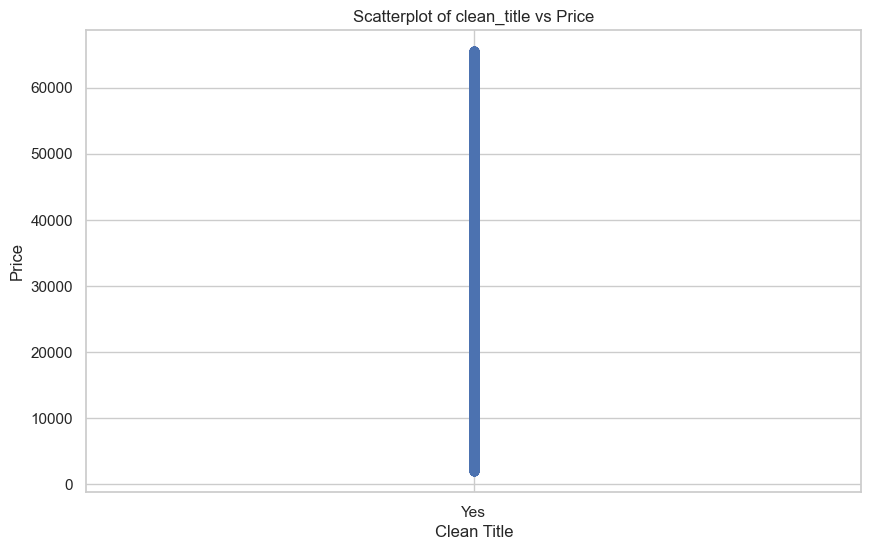

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data.clean_title, train_data.price)
plt.title('Scatterplot of clean_title vs Price')
plt.xlabel('Clean Title')
plt.ylabel('Price')
plt.show()

In [43]:
# from the above two scatterplots the accident and clean_title columns have no effect on the price of the cars
train_data.drop(['clean_title', 'accident'], axis=1, inplace=True)

In [44]:
train_data

,brand,milage,fuel_type,transmission,ext_col,int_col,price,horsepower,engine_displacement,age,quartile
0,Ford,74349,Gasoline,10-Speed A/T,Blue,Gray,11000,3.5,375.0,6,Q1 (25%)
1,BMW,80000,Gasoline,6-Speed M/T,Black,Black,8250,3.0,300.0,17,Q1 (25%)
2,Jaguar,91491,Gasoline,6-Speed A/T,Purple,Beige,15000,4.2,300.0,15,Q2 (50%)
3,BMW,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,63500,3.0,335.0,2,Q4 (100%)
4,Pontiac,111000,Gasoline,A/T,White,Black,7850,3.8,200.0,23,Q1 (25%)
...,...,...,...,...,...,...,...,...,...,...,...
54267,Land,69000,Hybrid,Transmission w/Dual Shift Mode,Silver,Black,32500,3.0,395.0,4,Q3 (75%)
54268,BMW,29000,Gasoline,8-Speed A/T,White,Brown,29000,4.4,445.0,7,Q3 (75%)
54269,Audi,94634,E85 Flex Fuel,6-Speed A/T,Black,Black,6500,2.0,220.0,9,Q1 (25%)
54270,Porsche,40989,Gasoline,Transmission w/Dual Shift Mode,White,Black,18950,3.6,420.0,11,Q2 (50%)


In [45]:
train_data.int_col.unique()

array(['Gray', 'Black', 'Beige', 'Brown', 'Silver', 'Jet Black', 'White',
       '–', 'Red', 'Blue', 'Medium Stone', 'Ash', 'Ebony', 'Shara Beige',
       'Tan', 'Global Black', 'Orange', 'Saddle Brown', 'Nero Ade',
       'Light Slate', 'Gold', 'Camel', 'Hotspur Hide', 'Charcoal',
       'Satin Black', 'Deep Chestnut', 'Diesel Gray / Black',
       'White / Brown', 'AMG Black', 'Parchment', 'Shale',
       'Canberra Beige', 'Black Onyx', 'Ebony / Pimento', 'Rhapsody Blue',
       'Rioja Red', 'Black / Express Red', 'Deep Garnet', 'Sandstone',
       'Dark Ash', 'Deep Cypress', 'Black / Stone Grey', 'Chestnut',
       'Navy Pier', 'Mistral Gray / Raven', 'Green', 'Dark Gray', 'Amber',
       'Medium Earth Gray', 'Charcoal Black', 'Ceramic', 'Walnut',
       'Hotspur', 'Black / Saddle', 'Mesa', 'Obsidian Black', 'Macchiato',
       'Whisper Beige', 'Graphite', 'Yellow', 'Medium Light Camel',
       'Nero', 'Nougat Brown', 'Ebony Black', 'Espresso', 'Cappuccino',
       'Portland', 'Medi

In [46]:
train_data.ext_col.unique()

array(['Blue', 'Black', 'Purple', 'Gray', 'White', 'Red', 'Silver',
       'Summit White', 'Platinum Quartz Metallic', 'Green', 'Orange',
       'Lunar Rock', 'Red Quartz Tintcoat', 'Gold', 'Jet Black Mica',
       'Delmonico Red Pearlcoat', 'Brown', 'Rich Garnet Metallic',
       'Stellar Black Metallic', 'Yellow', 'Metallic',
       'Ice Silver Metallic', 'Agate Black Metallic',
       'Rosso Mars Metallic', 'Beige', 'White Clearcoat',
       'Santorini Black Metallic', 'DB Black Clearcoat',
       'Snowflake White Pearl', 'Glacial White Pearl',
       'Maximum Steel Metallic', '–', 'Oxford White',
       'Velvet Red Pearlcoat', 'Beluga Black', 'Blue Reflex Mica',
       'Sparkling Silver', 'Black Clearcoat', 'Cobra Beige Metallic',
       'Soul Red Crystal Metallic', 'Bright White Clearcoat',
       'Shimmering Silver', 'Midnight Black Metallic',
       'Cajun Red Tintcoat', 'Cirrus Silver Metallic', 'Blu',
       'Burnished Bronze Metallic', 'Diamond Black',
       'White Diamond T

In [47]:
train_data.drop(['int_col', 'ext_col'], axis=1, inplace=True)

In [48]:
train_data.describe()

,milage,price,horsepower,engine_displacement,age
count,47678.000000,47678.000000,47678.000000,47678.000000,47678.000000
mean,79017.969504,26943.079219,3.649098,318.030682,9.496183
std,49418.154681,15404.132778,1.314001,95.406901,5.512482
min,100.000000,2000.000000,0.650000,76.000000,0.000000
25%,42653.000000,14500.000000,2.700000,252.000000,5.000000
50%,72329.000000,24900.000000,3.500000,310.000000,8.000000
75%,108000.000000,37475.500000,4.400000,375.000000,13.000000
max,405000.000000,65500.000000,8.400000,1020.000000,50.000000


In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   price                47678 non-null  int64  
 5   horsepower           47678 non-null  float64
 6   engine_displacement  47678 non-null  float64
 7   age                  47678 non-null  int64  
 8   quartile             47678 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.6+ MB


### Data Grouping 

In [50]:
# create a group of transmission, fuel_type and price
train_group = train_data.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
# Create pivot table 
train_pivot = train_group.pivot(index = 'transmission', columns= 'fuel_type', values='price')
train_data.pivot

<bound method DataFrame.pivot of          brand  milage      fuel_type                    transmission  price  \
0         Ford   74349       Gasoline                    10-Speed A/T  11000   
1          BMW   80000       Gasoline                     6-Speed M/T   8250   
2       Jaguar   91491       Gasoline                     6-Speed A/T  15000   
3          BMW    2437         Hybrid  Transmission w/Dual Shift Mode  63500   
4      Pontiac  111000       Gasoline                             A/T   7850   
...        ...     ...            ...                             ...    ...   
54267     Land   69000         Hybrid  Transmission w/Dual Shift Mode  32500   
54268      BMW   29000       Gasoline                     8-Speed A/T  29000   
54269     Audi   94634  E85 Flex Fuel                     6-Speed A/T   6500   
54270  Porsche   40989       Gasoline  Transmission w/Dual Shift Mode  18950   
54272     Audi   35000         Hybrid                     8-Speed A/T  37499   

      

In [51]:
train_data.transmission.unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', 'Transmission Overdrive Switch',
       '9-Speed Automatic', '7-Speed M/T', '8-Speed A/T',
       '6-Speed Automatic', 'M/T', '5-Speed Automatic',
       'CVT Transmission', '9-Speed A/T', '10-Speed Automatic',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic',
       '7-Speed DCT Automatic', 'Automatic CVT', '7-Speed Automatic',
       '4-Speed Automatic', '7-Speed Automatic with Auto-Shift',
       '1-Speed A/T', '6-Speed Automatic with Auto-Shift',
       '6-Speed Manual', '8-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       '7-Speed Manual', 'CVT-F', '1-Speed Automatic', 'F',
       'SCHEDULED FOR OR IN PRODUCTION', '6 Speed At/Mt',
       '8-Speed Manual', '6 Speed Mt', '2-Speed A/T', '–',
       '10-Speed Automatic with Overdrive', '6-Speed'], dtype=object)

In [52]:
train_data.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
price                  0
horsepower             0
engine_displacement    0
age                    0
quartile               0
dtype: int64

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

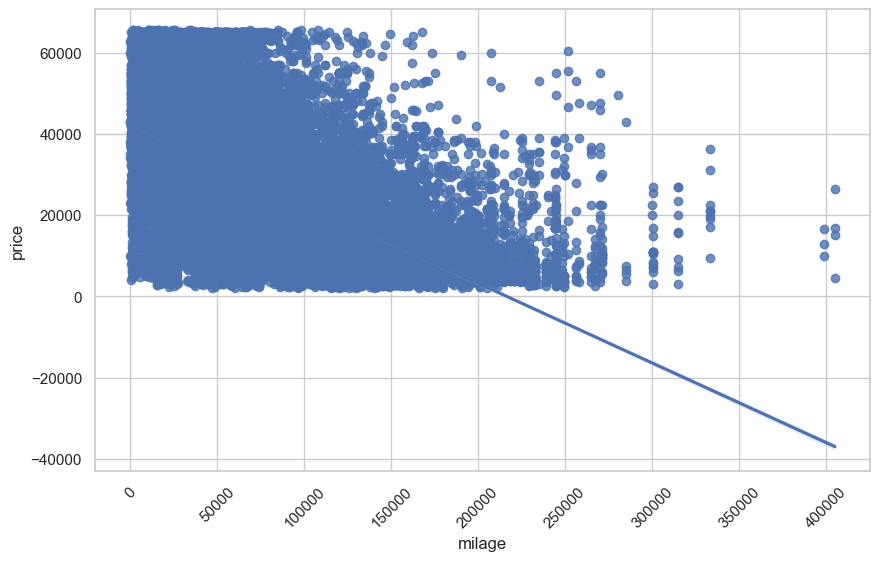

In [53]:
# Making a regression plot of milage vs price

plt.figure(figsize=(10,6))
sns.regplot(x='milage', y='price', data = train_data)
plt.xticks(rotation=45)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

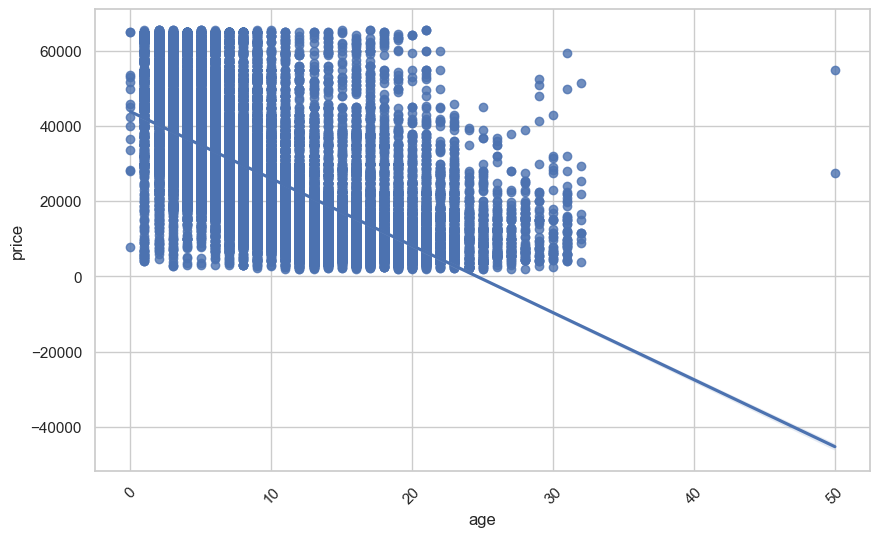

In [54]:
# making a regression plot between age and price
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y = 'price', data= train_data)
plt.xticks(rotation=45)

(array([-20.,   0.,  20.,  40.,  60.,  80.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80')])

<Figure size 1000x600 with 0 Axes>

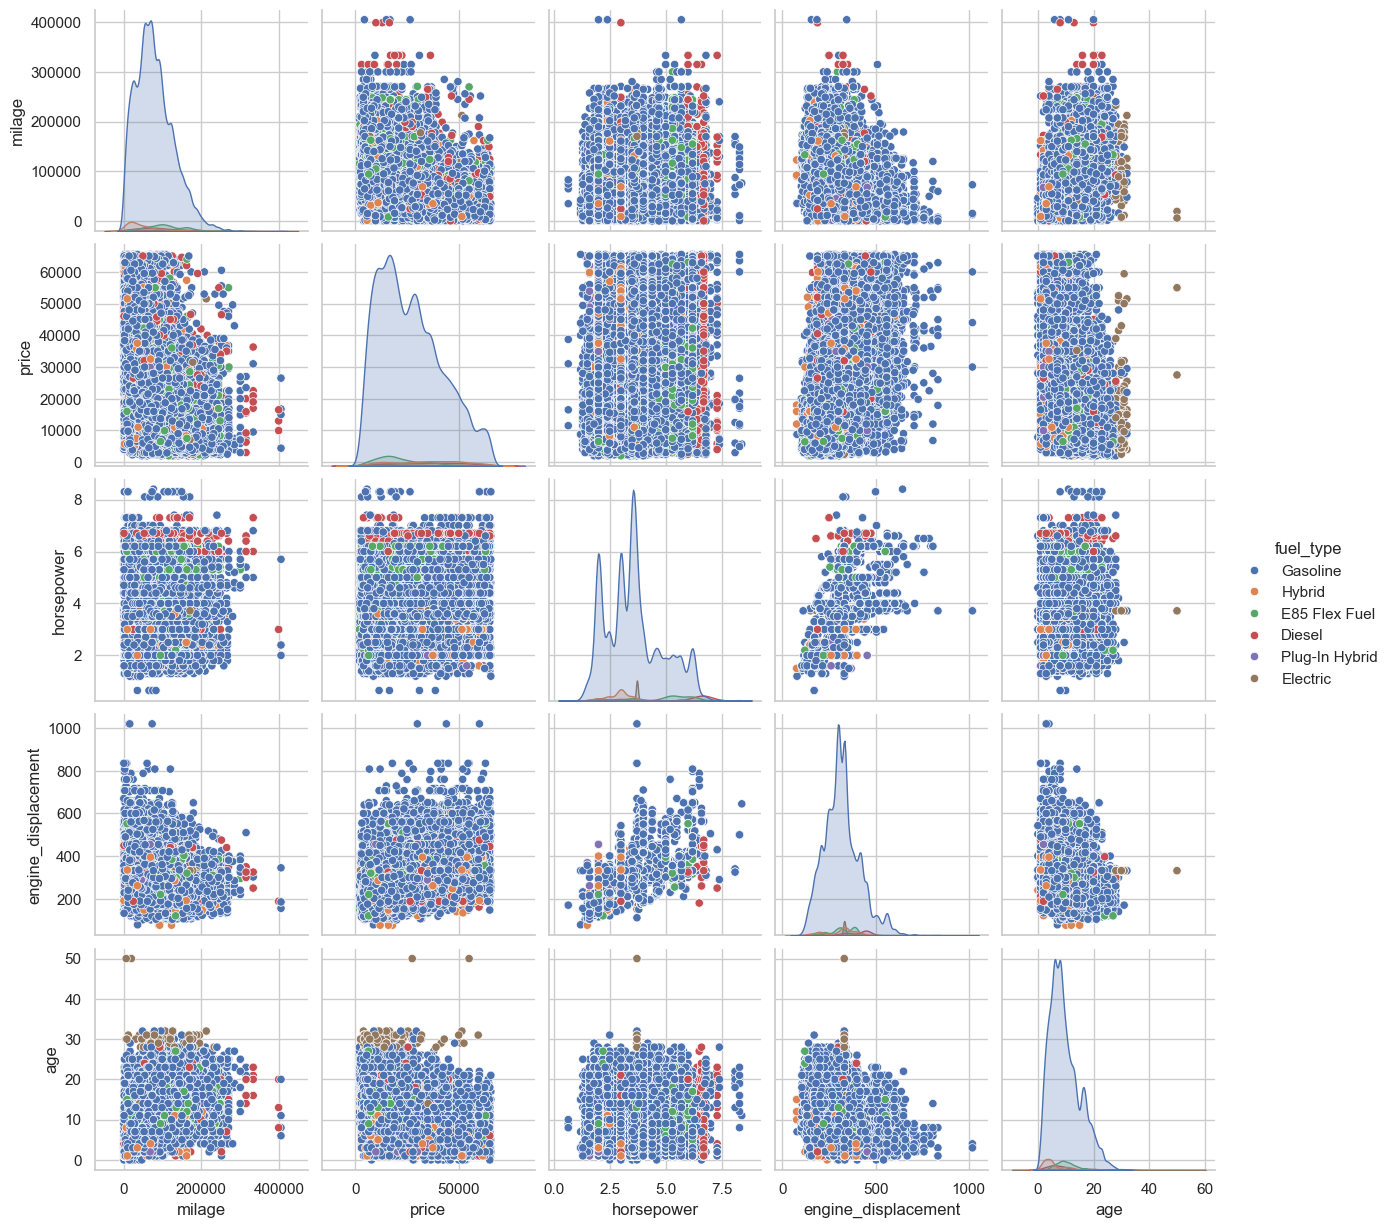

In [55]:
# Draw a pairplot of all the features in train_data except brand, transmission
plt.figure(figsize=(10, 6))
sns.pairplot(train_data, hue='fuel_type')
plt.xticks(rotation=45)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

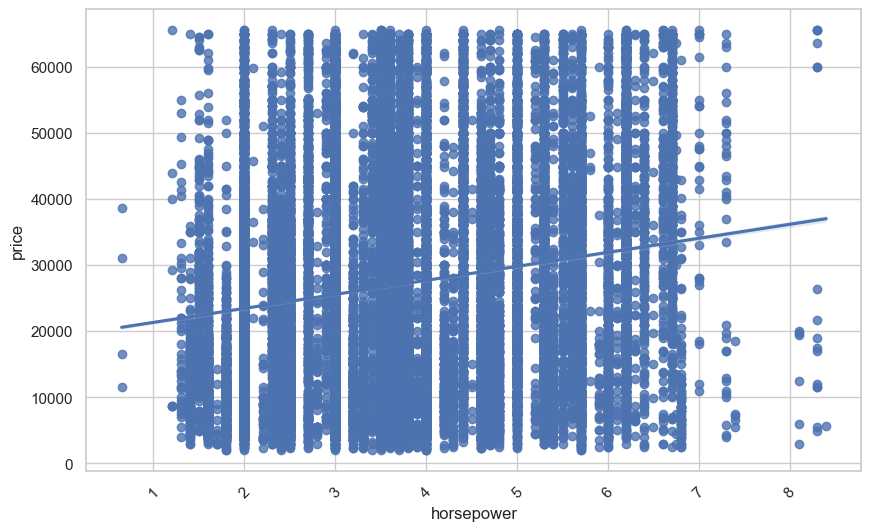

In [56]:
# Regression plot of Horsepower vs price

plt.figure(figsize=(10, 6))
sns.regplot(x='horsepower', y='price', data=train_data)
plt.xticks(rotation=45)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

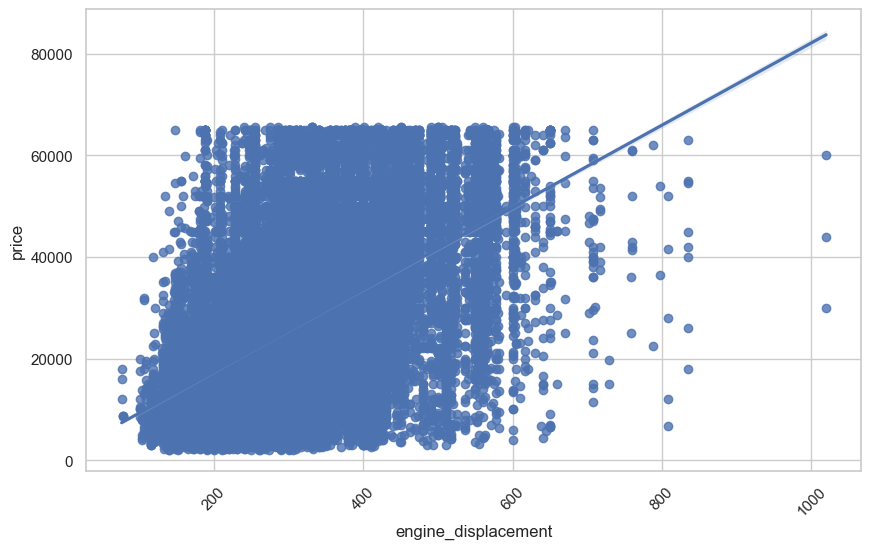

In [57]:
# Scatterplot of engine_displacement vs price
plt.figure(figsize=(10, 6))
sns.regplot(x='engine_displacement', y = 'price', data = train_data)
plt.xticks(rotation=45)

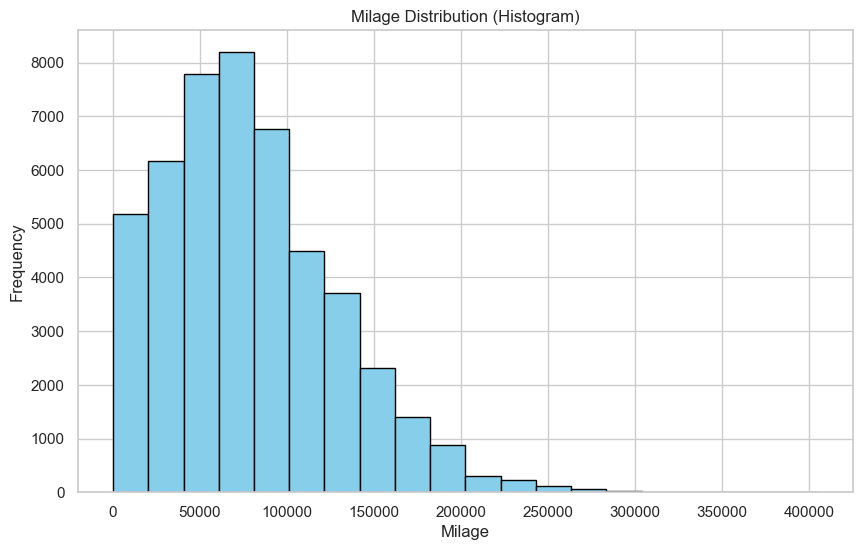

In [58]:
# Create a histogram for the milage column
plt.figure(figsize=(10, 6))
plt.hist(train_data.milage, bins=20, color='skyblue', edgecolor = 'black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()

In [58]:
# from scipy import stats
# # To find pearson coefficient - horsepower and price
# pearson_coef, p_value = stats.pearsonr(train_data.horsepower), train_data.price

# print("The Pearson Correlation Coefficient is", pearson_coef, " with a p_value of P =", p_value)

## Model Development

In [59]:
train_data.fuel_type.value_counts()

fuel_type
Gasoline          43613
E85 Flex Fuel      1435
Hybrid             1323
Diesel              889
Electric            270
Plug-In Hybrid      148
Name: count, dtype: int64

In [60]:
# # import category encoders

# from category_encoders import TargetEncoder
# encoder = TargetEncoder(cols =['fuel_type'])
# train_data['fuel_type_target'] = encoder.fit_transform(train_data.fuel_type, train_data.price)
# train_data.head()

In [61]:
# from category_encoders import TargetEncoder

# # Sample data (replace with your data)
# data = pd.DataFrame({'category': ['A', 'B', 'A', 'C', 'B'],
#                      'target': [10, 20, 15, 25, 18]})

# # Create the target encoder
# encoder = TargetEncoder(cols='category', target='target')

# # Encode the categorical feature
# encoded_data = encoder.fit_transform(data)
# print(encoded_data)

In [64]:
# Drop quartile column8# Copy train data 
train_cpy = train_data.copy()

In [65]:
train_cpy.head().T

,0,1,2,3,4
brand,Ford,BMW,Jaguar,BMW,Pontiac
milage,74349,80000,91491,2437,111000
fuel_type,Gasoline,Gasoline,Gasoline,Hybrid,Gasoline
transmission,10-Speed A/T,6-Speed M/T,6-Speed A/T,Transmission w/Dual Shift Mode,A/T
price,11000,8250,15000,63500,7850
horsepower,3.5,3.0,4.2,3.0,3.8
engine_displacement,375.0,300.0,300.0,335.0,200.0
age,6,17,15,2,23


In [66]:
train_cpy.isna().sum()

brand                  0
milage                 0
fuel_type              0
transmission           0
price                  0
horsepower             0
engine_displacement    0
age                    0
dtype: int64

In [67]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                47678 non-null  object 
 1   milage               47678 non-null  int64  
 2   fuel_type            47678 non-null  object 
 3   transmission         47678 non-null  object 
 4   price                47678 non-null  int64  
 5   horsepower           47678 non-null  float64
 6   engine_displacement  47678 non-null  float64
 7   age                  47678 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ MB


In [68]:
for label, content in train_cpy.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        # Convert all object and string data types into categories 
        train_cpy[label] = content.astype('category').cat.as_ordered()

In [69]:
train_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47678 entries, 0 to 54272
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   brand                47678 non-null  category
 1   milage               47678 non-null  int64   
 2   fuel_type            47678 non-null  category
 3   transmission         47678 non-null  category
 4   price                47678 non-null  int64   
 5   horsepower           47678 non-null  float64 
 6   engine_displacement  47678 non-null  float64 
 7   age                  47678 non-null  int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 2.3 MB


In [70]:
# Turn categorical values into numbers 
for label, content in train_cpy.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_cpy[label] = pd.Categorical(content).codes + 1

In [71]:
train_cpy.head()

,brand,milage,fuel_type,transmission,price,horsepower,engine_displacement,age
0,14,74349,4,3,11000,3.5,375.0,6
1,5,80000,4,19,8250,3.0,300.0,17
2,21,91491,4,15,15000,4.2,300.0,15
3,5,2437,5,42,63500,3.0,335.0,2
4,39,111000,4,33,7850,3.8,200.0,23


In [72]:
# split data into train and validation set 
X = train_cpy.drop("price", axis=1)
y = train_cpy.price

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)

In [74]:
X_train

,brand,milage,fuel_type,transmission,horsepower,engine_displacement,age
46713,40,61000,4,27,3.0,330.0,6
41912,19,107543,4,15,2.4,200.0,11
42263,5,72000,4,27,3.0,300.0,8
31842,34,52100,4,33,4.0,463.0,5
9733,34,249083,4,33,5.0,302.0,20
...,...,...,...,...,...,...,...
12832,46,78007,4,33,2.5,173.0,10
50918,20,6188,4,33,5.6,400.0,1
43433,19,1500,4,15,3.8,291.0,2
980,37,82900,4,36,3.5,290.0,8


In [75]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47582, 7), (96, 7), (47582,), (96,))

In [76]:
# initialising classifier models 
clf1 = RandomForestRegressor()
clf2 = LinearRegression()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

LinearRegression()

In [77]:
clf1.score(X_val, y_val)

0.611803543887975

In [78]:
clf2.score(X_val, y_val)

0.5599804001542559

In [79]:
# Setting a random seed 
np.random.seed(42)

In [80]:
# Doing Hyperparameter tuning

hyper_parameters ={
    'n_estimators': [100, 200, 300], 
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# import gridsearchCV
from sklearn.model_selection import GridSearchCV

rf_gridsearch = RandomForestRegressor()

grid_search = GridSearchCV(rf_gridsearch, hyper_parameters, cv=5)
# grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_search.best_params_

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
grid_search.best_score_

0.6555166958660998

In [81]:
rf_tuned = RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_leaf=4, min_samples_split=2)

In [82]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=300)

In [83]:
rf_tuned.score(X_val, y_val)

0.6635556056482541

In [ ]:
# Trying Using a polynomial regressor model 
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_tain_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Create the polynomial regressor
poly_reg = rf_tuned
# Fit the model 
poly_reg.fit(X_tain_poly, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=300)

In [ ]:
print(poly_reg.score(X_val_poly, y_val))

NameError: name 'poly_reg' is not defined

In [ ]:
poly = {'1': 4,
        '2': 5,
        '3': 6
}

for key, value in poly.items():
    poly = PolynomialFeatures(degree=value)
    X_tain_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    # Create the polynomial regressor
    poly_reg = rf_tuned
    # Fit the model 
    poly_reg.fit(X_tain_poly, y_train)
    print(poly_reg.score(X_val_poly, y_val))

0.6605523933736965
0.653202667303101


In [ ]:
from sklearn.metrics import mean_absolute_error
def show_scores(model, X_train, X_val):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    score = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_val, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_val, val_preds)
    }
    return score


In [ ]:
show_scores(poly_reg, X_tain_poly, X_val_poly)

{'Training MAE': 5624.568165239961,
 'Valid MAE': 7235.713269339062,
 'Training R^2': 0.7567558623787224,
 'Valid R^2': 0.6577545746663507}

In [84]:
# Store processed training data for later use
train_cpy.to_csv('./data/train_data_processed.csv', index=False)

Repeat Preprocessing Techniques on the test dataset

In [86]:
test_data = pd.read_csv('./data/test.csv')

In [87]:
# Drop columns which do not improve model predictions
test_data.drop(['model', 'id', 'ext_col', 'int_col', 'clean_title', 'accident'], axis=1, inplace=True)
test_data

,brand,model_year,milage,fuel_type,engine,transmission
0,Mercedes-Benz,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T
1,Lexus,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T
2,Mercedes-Benz,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T
3,Land,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode
4,BMW,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T
...,...,...,...,...,...,...
36178,GMC,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T
36179,Chevrolet,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T
36180,Toyota,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T
36181,Lincoln,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T


In [88]:
# Handle missing fuel_type 
test_data.fuel_type.replace('–', 'Electric', inplace=True)
test_data.fuel_type.replace('not supported', 'Electric', inplace=True)


In [90]:
# Extract engine features from test data
test_data[['horsepower', 'engine_displacement']] = test_data.engine.apply(extract_engine_features).apply(pd.Series)

In [91]:
test_data.horsepower.isnull().sum()

405

In [92]:
# Fill missing data in extracted engine features 
test_data.horsepower.fillna(train_data.horsepower.mean(), inplace =True)
test_data.engine_displacement.fillna(train_data.engine_displacement.mean(), inplace=True)

In [93]:
test_data.horsepower.isnull().sum()

0

In [95]:
test_data.engine_displacement.isnull().sum()

0

In [96]:
# Drop engine column in test data
test_data.drop('engine', axis=1, inplace=True)


In [98]:
# Extract car age from model_year column
test_data["age"] = 2024 - test_data.model_year

In [99]:
# Drop model_year column from test dataset
test_data.drop('model_year', axis=1, inplace=True)

In [102]:
test_data

,brand,milage,fuel_type,transmission,horsepower,engine_displacement,age
0,Mercedes-Benz,73000,Gasoline,A/T,3.5,302.0,10
1,Lexus,128032,Gasoline,8-Speed A/T,3.5,275.0,9
2,Mercedes-Benz,51983,Gasoline,7-Speed A/T,2.0,241.0,9
3,Land,29500,Gasoline,Transmission w/Dual Shift Mode,5.0,518.0,6
4,BMW,90000,Gasoline,8-Speed A/T,3.0,335.0,4
...,...,...,...,...,...,...,...
36178,GMC,4500,Gasoline,10-Speed A/T,6.2,420.0,5
36179,Chevrolet,185000,Gasoline,4-Speed A/T,5.3,295.0,20
36180,Toyota,116000,Gasoline,5-Speed M/T,1.8,132.0,13
36181,Lincoln,39000,Gasoline,10-Speed A/T,3.5,450.0,5


In [103]:

for label, content in test_data.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        # Convert all object and string data types into categories 
        test_data[label] = content.astype('category').cat.as_ordered()

# Turn categorical values into numbers 
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[label] = pd.Categorical(content).codes + 1


In [104]:
test_data

,brand,milage,fuel_type,transmission,horsepower,engine_displacement,age
0,35,73000,4,34,3.5,302.0,10
1,27,128032,4,27,3.5,275.0,9
2,35,51983,4,21,2.0,241.0,9
3,26,29500,4,43,5.0,518.0,6
4,5,90000,4,27,3.0,335.0,4
...,...,...,...,...,...,...,...
36178,16,4500,4,3,6.2,420.0,5
36179,10,185000,4,8,5.3,295.0,20
36180,50,116000,4,12,1.8,132.0,13
36181,28,39000,4,3,3.5,450.0,5


In [105]:
# Save processed test data for use later 
test_data.to_csv('./data/test_data_processed.csv', index=False)

In [106]:
# After submission I got a Root Mean Squared Error (RMSE) of 77996.933

> Trying out other regression models and techniques like:
* Ridge
* Lasso
* ElasticNet
* GradientBoosting
* SVR
* XGBoost
* LightGBM

In [111]:
# importing all required libraries 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [112]:
def root_mean_squared_error(y_true, y_preds):
    return np.sqrt(mean_squared_error(y_true, y_preds))

In [113]:
# load train data 
train_data = pd.read_csv('./data/train_data_processed.csv')
train_data

,brand,milage,fuel_type,transmission,price,horsepower,engine_displacement,age
0,14,74349,4,3,11000,3.5,375.0,6
1,5,80000,4,19,8250,3.0,300.0,17
2,21,91491,4,15,15000,4.2,300.0,15
3,5,2437,5,42,63500,3.0,335.0,2
4,39,111000,4,33,7850,3.8,200.0,23
...,...,...,...,...,...,...,...,...
47673,25,69000,5,42,32500,3.0,395.0,4
47674,5,29000,4,27,29000,4.4,445.0,7
47675,4,94634,2,15,6500,2.0,220.0,9
47676,40,40989,4,42,18950,3.6,420.0,11


In [115]:
X = train_data.drop('price', axis=1)
y = train_data.price
# split data into train and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  random_state=42, 
                                                  test_size=0.02)

In [121]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

In [117]:
# Define models 
models = {
    'Ridge': Ridge(), 
    'Lasso': Lasso(), 
    'ElasticNet': ElasticNet(), 
    'GradientBoostingRegressor': GradientBoostingRegressor(), 
    'SVR': SVR(),
    'XGBoost': XGBRegressor(), 
    'LightGBM': LGBMRegressor()
}

In [118]:
for name, model in models.items():
    # Cross-Validation
    cv_Scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name} - Cross-validation R^2 Score: {cv_Scores.mean():.4f}")
    
    # Train on the full training set
    model.fit(X_train_scaled, y_train)

    # Predict on validation set 
    y_preds = model.predict(X_val_scaled)

    # Evaluate 
    rmse = root_mean_squared_error(y_val, y_preds)
    r2  = r2_score(y_val, y_preds)
    print(f"{name} - Validation RMSE: {rmse:.4f}")
    print(f"{name} - Test R^2 score: {r2:.4f}\n")

Ridge - Cross-validation R^2 Score: 0.5752
Ridge - Validation RMSE: 10103.7925
Ridge - Test R^2 score: 0.5659

Lasso - Cross-validation R^2 Score: 0.5752
Lasso - Validation RMSE: 10103.8228
Lasso - Test R^2 score: 0.5659

ElasticNet - Cross-validation R^2 Score: 0.5491
ElasticNet - Validation RMSE: 10419.6738
ElasticNet - Test R^2 score: 0.5383

GradientBoostingRegressor - Cross-validation R^2 Score: 0.6492
GradientBoostingRegressor - Validation RMSE: 9037.1501
GradientBoostingRegressor - Test R^2 score: 0.6527

SVR - Cross-validation R^2 Score: 0.1482
SVR - Validation RMSE: 13859.6511
SVR - Test R^2 score: 0.1832

XGBoost - Cross-validation R^2 Score: 0.6536
XGBoost - Validation RMSE: 9478.3078
XGBoost - Test R^2 score: 0.6180

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[L

Because the validation dataset is quite small I expect the model XGBoost and LightGBM models to have better RMSE values with the test dataset


In [120]:
# read test data 
test_data
test_data_unprocessed = pd.read_csv('./data/test.csv')
test_data_id = test_data_unprocessed.id

In [123]:
# to get better results from model we will use the entire training dataset to train the model
# So X will have to be scaled as X_scalled

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scaling test data so it matches training data as train_scaled

test_scaled = scaler.fit_transform(test_data) 

In [124]:
model = LGBMRegressor()

model.fit(X_scaled, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 47678, number of used features: 7
[LightGBM] [Info] Start training from score 26943.079219


LGBMRegressor()

In [125]:
# predict prices on test data
preds = model.predict(test_scaled)

In [128]:
test_data.head()

,brand,milage,fuel_type,transmission,horsepower,engine_displacement,age
0,35,73000,4,34,3.5,302.0,10
1,27,128032,4,27,3.5,275.0,9
2,35,51983,4,21,2.0,241.0,9
3,26,29500,4,43,5.0,518.0,6
4,5,90000,4,27,3.0,335.0,4


In [129]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                36183 non-null  int8   
 1   milage               36183 non-null  int64  
 2   fuel_type            36183 non-null  int8   
 3   transmission         36183 non-null  int8   
 4   horsepower           36183 non-null  float64
 5   engine_displacement  36183 non-null  float64
 6   age                  36183 non-null  int64  
dtypes: float64(2), int64(2), int8(3)
memory usage: 1.2 MB


In [136]:
preds = pd.Series(preds)
_second_ = {
    'id': test_data_id, 
    'price': preds,
}

In [138]:
submission_2 = pd.DataFrame(_second_)

In [140]:
submission_2.to_csv('./submissions/2nd.csv', index=False)

> Submitted predictions have a RMSE of: 78312.016


Now performing parameters tuning on the LGBMRegressor model

In [141]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [143]:
np.random.seed(42)

In [142]:
# Define hyperparameter space
param_dist = {
    'num_leaves': np.arange(20, 3000, 200),
    'max_depth': [-1, 5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_samples': [1, 5, 10, 15, 20, 25],
    'subsample': np.arange(0.6, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5, 10]
}

In [148]:
np.random.seed(42)
# Inintialize LightGBM Regressor
lgb = LGBMRegressor(random_state=42)

# Set up RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(estimator=lgb, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   scoring='r2', 
                                   cv=kf, verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X, y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 47678, number of used features: 7
[LightGBM] [Info] Start training from score 26943.079219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_param_'

In [150]:
# Print the best parameters and score 
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score (MSE): ", -random_search.best_score_)

Best parameters found:  {'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 2, 'num_leaves': 420, 'n_estimators': 400, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best cross-validation score (MSE):  -0.6631507922624607


In [151]:
# Use best estimator to predict on the test set 
best_lgb = random_search.best_estimator_
y_preds = best_lgb.predict(test_data)

In [163]:
# Feature importance

feature_importance = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': best_lgb.feature_importances_
})

In [164]:
feature_importance
print(feature_importance.sort_values('Importance', ascending=False))

               Feature  Importance
1               milage       42619
5  engine_displacement       36646
0                brand       29851
4           horsepower       19072
3         transmission       18532
6                  age       14056
2            fuel_type        2968


In [153]:
data = {
    'id': test_data_id,
    'price': y_preds
}
third_ = pd.DataFrame(data)

In [174]:
third_.to_csv('./submissions/3rd.csv', index=False)

In [155]:
# third submission gave a rmse of: 78082.745

Tuning hyperparameters of the xgboost regressor

In [166]:
# Split data into train and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)
# Scaling data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
test_scaled = scaler.fit_transform(test_data)

In [167]:
# Define the hyperparameter space 
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5]
}

In [169]:
# Initialize XGBoost regressor
xgb = XGBRegressor(random_state = 42)

# Setup Randomized SearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions= param_dist, 
    n_iter=105, 
    scoring='r2',
    cv=kf, 
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)
# Fit randomized search cv
random_search.fit(X_scaled, y)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=Non...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500,
                                                         1000],
                                        'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
                                        'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [170]:
# use best estimator to predict on test set 
best_xgb = random_search.best_estimator_
y_preds = best_xgb.predict(test_scaled)

In [171]:
third_ = pd.DataFrame({
    'id': test_data_id, 
    'price': y_preds
})

In [173]:
third_.to_csv('./submissions/4th.csv', index=False)

### Re-Doing our data preprocessing

After using many regression models without any improve above the RandomForestRegressor model with polynomial variables of degree 3.
I will attempt to improve the performance of our models:
* RandomForestRegressor
* XGBoost Regressor 
* LGBMRegressor

Starting by including dropped features 
* Accident
* Clean_title
* Extract features from transmission 
* Creating new compouding features(Feature Engineering)

In [176]:
# Starting with the accident column 
train_data_2 = pd.read_csv('./data/train.csv')

train_data_2

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54268,54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


In [177]:
train_data_2.accident.unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [178]:
train_data

,brand,milage,fuel_type,transmission,price,horsepower,engine_displacement,age
0,14,74349,4,3,11000,3.5,375.0,6
1,5,80000,4,19,8250,3.0,300.0,17
2,21,91491,4,15,15000,4.2,300.0,15
3,5,2437,5,42,63500,3.0,335.0,2
4,39,111000,4,33,7850,3.8,200.0,23
...,...,...,...,...,...,...,...,...
47673,25,69000,5,42,32500,3.0,395.0,4
47674,5,29000,4,27,29000,4.4,445.0,7
47675,4,94634,2,15,6500,2.0,220.0,9
47676,40,40989,4,42,18950,3.6,420.0,11


In [182]:
# Since I will be doing multiple preprocessing adding columns back to our train and test data this function seemed necessary
def car_sales_preprocessing(data):
    # Drop columns which do not improve model predictions
    data.drop(['model', 'id', 'ext_col', 'int_col', 'clean_title'], axis=1, inplace=True)
    
    # Handle missing fuel_type 
    data.fuel_type.replace('–', 'Electric', inplace=True)
    data.fuel_type.replace('not supported', 'Electric', inplace=True)

    # Extract engine features from test data
    data[['horsepower', 'engine_displacement']] = data.engine.apply(extract_engine_features).apply(pd.Series)

    # Fill missing data in extracted engine features 
    data.horsepower.fillna(data.horsepower.mean(), inplace =True)
    data.engine_displacement.fillna(data.engine_displacement.mean(), inplace=True)

    # Drop engine column in test data
    data.drop('engine', axis=1, inplace=True)

    # Extract car age from model_year column
    data["age"] = 2024 - data.model_year

    # Drop model_year column from test dataset
    data.drop('model_year', axis=1, inplace=True)

    for label, content in test_data.items():
        if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
            # Convert all object and string data types into categories 
            data[label] = content.astype('category').cat.as_ordered()

    # Turn categorical values into numbers 
    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            data[label] = pd.Categorical(content).codes + 1

    return data

In [185]:
data = car_sales_preprocessing(train_data_2)

KeyError: "['model', 'id', 'ext_col', 'int_col', 'clean_title'] not found in axis"

In [187]:
data 

,brand,milage,fuel_type,transmission,accident,price,horsepower,engine_displacement,age
0,15,74349,4,3,2,11000,3.5,375.000000,6
1,5,80000,4,19,2,8250,3.0,300.000000,17
2,22,91491,4,15,2,15000,4.2,300.000000,15
3,5,2437,5,44,2,63500,3.0,335.000000,2
4,41,111000,4,35,2,7850,3.8,200.000000,23
...,...,...,...,...,...,...,...,...,...
54268,5,29000,4,28,2,29000,4.4,445.000000,7
54269,4,94634,2,15,1,6500,2.0,220.000000,9
54270,42,40989,4,44,1,18950,3.6,420.000000,11
54271,42,1518,4,30,2,194965,4.0,331.698323,1


In [190]:
test_data = pd.read_csv('./data/test.csv')
test_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
36178,90451,GMC,Yukon Denali,2019,4500,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Black,None reported,Yes
36179,90452,Chevrolet,Silverado 1500 Z71 Extended Cab,2004,185000,Gasoline,295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes
36180,90453,Toyota,Corolla LE,2011,116000,Gasoline,132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Beige,Gray,None reported,Yes
36181,90454,Lincoln,Navigator Reserve,2019,39000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Orange,None reported,Yes


In [191]:
test_data_accident = car_sales_preprocessing(test_data)

In [192]:
test_data_accident

,brand,milage,fuel_type,transmission,accident,horsepower,engine_displacement,age
0,35,73000,4,34,2,3.5,302.0,10
1,27,128032,4,27,2,3.5,275.0,9
2,35,51983,4,21,2,2.0,241.0,9
3,26,29500,4,43,1,5.0,518.0,6
4,5,90000,4,27,1,3.0,335.0,4
...,...,...,...,...,...,...,...,...
36178,16,4500,4,3,2,6.2,420.0,5
36179,10,185000,4,8,1,5.3,295.0,20
36180,50,116000,4,12,2,1.8,132.0,13
36181,28,39000,4,3,2,3.5,450.0,5


Now that we have our train data set with the accident column included this time as pandas categories.

starting with

### 1. XGBoost Regressor

In [195]:
# Get target and 
X = data.drop('price', axis=1)
y = data.price

# Split the data into train and validation 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.002, random_state=42)

# Scale the features
scaler = StandardScaler()
train_accident_scaled = scaler.fit(X_train)
test_accident_scaled = scaler.fit(test_data_accident)

# Define the hyperparameterspace
param_dist = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5]
}

xgb = XGBRegressor(random_state = 42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score (MSE): ", -random_search.best_score_)

# Use the best estimator to predict on the test set
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_val)

# Evaluate on the test set
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)





Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best cross-validation score (MSE):  4642375048.930894


In [196]:
rmse

20787.74161937754

In [200]:
test_scaled = scaler.fit_transform(test_data_accident)

In [203]:
test_accident_scaled_preds = best_xgb.predict(test_scaled)

In [204]:
data = pd.DataFrame({
    'id': test_data_id, 
    'price': test_accident_scaled_preds
})

In [206]:
data.to_csv('./submissions/5th.csv', index=False)

using the got a score of: 108842.241[really bad]

In [207]:
rf = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [208]:
rf_tuned = RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_jobs=-1)

In [209]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=4, n_estimators=300)

In [210]:
rf_tuned.score(X_val, y_val)

0.23964923971899132

In [211]:
rf_tuned.feature_importances_

array([0.08857747, 0.46073958, 0.00407449, 0.06599506, 0.01278162,
       0.08142385, 0.12934612, 0.15706181])

In [212]:
X_train

,brand,milage,fuel_type,transmission,accident,horsepower,engine_displacement,age
31448,5,140000,4,35,2,4.4,400.0,17
34251,14,9005,4,44,2,3.9,660.0,5
43476,5,53000,4,44,1,2.0,228.0,7
6484,28,117292,4,15,2,2.0,240.0,8
41630,36,83315,4,35,2,2.0,208.0,8
...,...,...,...,...,...,...,...,...
11284,53,60660,4,35,2,2.0,316.0,6
44732,10,28470,4,44,2,7.0,505.0,9
38158,31,106000,4,35,2,1.6,181.0,12
860,42,13500,4,26,2,3.6,480.0,14


In [213]:
best_lgb.feature_importances_

array([29851, 42619,  2968, 18532, 19072, 36646, 14056])